In [1]:
# !pip install polars
# !poetry add polars

In [2]:
import polars as pl
import polars.selectors as cs

## Polars - Blazingly Fast DataFrame Library

<img src="images/polars_github_banner.svg" alt="drawing" width="500"/>

* [Fancy website](https://pola.rs/)
* [GitHub](https://github.com/pola-rs/polars)
* [User guide](https://docs.pola.rs/) <-- Очень советую &#x1F525;
* [Docs](https://docs.pola.rs/api/python/stable/reference/index.html)
___

#### Key features 	&#x1F4AB;
* **Fast: Written from scratch in Rust**, designed close to the machine and without external dependencies.
* I/O: First class support for **all common data storage layers: local, cloud storage & databases.**
* Intuitive API: Write your queries the way they were intended. **Polars, internally, will determine the most efficient way to execute using its query optimizer.**
* Out of Core: The streaming API allows you to process your results **without requiring all your data to be in memory at the same time**
* **Parallel:** Utilises the power of your machine by **dividing the workload among the available CPU cores** without any additional configuration.
* Vectorized Query Engine: Using Apache Arrow, a columnar data format, to process your queries in a vectorized manner and SIMD to **optimize CPU usage.**

#### Philosophy &#x1F48E;
**The goal of Polars is to provide a lightning fast DataFrame library that:**

1. Utilizes all available cores on your machine.
2. Optimizes queries to reduce unneeded work/memory allocations.
3. Handles datasets much larger than your available RAM.
4. A consistent and predictable API.
5. Adheres to a strict schema (data-types should be known before running the query).

___
**By default, polars is limited to 2^32 (~4.2 billion rows)!!!!!** 

**To increase this limit 2^64 (~18 quintillion) by enabling big index:** `pip install polars-u64-idx`


![ChessUrl](https://media1.tenor.com/m/Veh7TgAkUxIAAAAd/on-a-perdu-we-lost.gif)

> Вспоминаем как Пандас уирает на > 10 млн записей и плачем....

In [3]:
from datetime import datetime

#### Reading the data

In [4]:
df = pl.read_csv("data/dummy_dataset_small.csv")
# df.to_csv(path)

In [5]:
df

id,name,birth_date,hair_color,is_MU_fan,iq,accession_month,balance,debt,country,city,street_name,building_number,coordinate,license_plate,vin,swift,company_name,company_suffix,job_name,credit_card_expire,credit_card_number,credit_card_security_code,currency
i64,str,str,str,bool,i64,i64,f64,f64,str,str,str,i64,f64,str,str,str,str,str,str,str,i64,i64,str
1379,"""Amber""","""1998-02-15""","""Turquoise""",false,580,5,7.9476e8,2.1117e9,"""Portugal""","""East Joannafort""","""Matthew Estate""",532,156.875421,"""77X•751""","""X2ZCH6JJX6XG0GYFY""","""NEXTGBHN""","""Patrick LLC""","""PLC""","""Furniture designer""","""02/26""",3554507453178061,162,"""OMR"""
544,"""Karen""","""2018-09-06""","""MediumOrchid""",true,241,8,4.8810e8,6.8856e9,"""Reunion""","""Lindaside""","""Chloe Forest""",4333,112.248561,"""05S UF6""","""Y6Z43F7Y3JGD3KYCE""","""NNNBGBYS""","""Mckee Inc""","""Ltd""","""Therapist, drama""","""06/28""",2517381416513097,990,"""MMK"""
5667,"""John""","""2020-11-04""","""MintCream""",true,680,5,3.4368e8,8.7849e9,"""Mongolia""","""Aaronborough""","""Logan Lakes""",49216,-103.165232,"""191 1GP""","""RBJ4K19M8T6MTYX5U""","""EVJLGBNO""","""Thompson-Choi""","""Group""","""Cabin crew""","""05/27""",2257264598104972,79,"""CDF"""
8606,"""Tiffany""","""2018-06-27""","""GhostWhite""",true,20,9,9.8101e8,7.9324e9,"""Germany""","""Jillborough""","""Hess Street""",55944,-40.574345,"""05E T01""","""468207YG6CHZU10CB""","""MDYQGBH7""","""Solomon LLC""","""PLC""","""Accommodation manager""","""11/26""",3560664812925229,206,"""IDR"""
3341,"""Stacy""","""2001-05-01""","""Olive""",false,984,7,4.6134e7,7.2156e9,"""Rwanda""","""East Noahfort""","""Shannon Bridge""",61265,58.009005,"""0NP Z16""","""TKSNHAT6XK15HCE5Y""","""KGSCGB6U""","""Cook, Osborne and Rodriguez""","""LLC""","""Dentist""","""05/32""",3533986016849507,911,"""TWD"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
9324,"""Steven""","""2011-08-25""","""MediumSpringGreen""",false,119,3,3.8841e8,5.0166e9,"""Cook Islands""","""Harrisonborough""","""Daniel Crossroad""",7354,174.913797,"""164-KPG""","""17MAVPKN1NHGF2XTD""","""BTBRGB7P""","""Simmons-Jenkins""","""and Sons""","""Speech and language therapist""","""07/32""",4363818815761,629,"""KMF"""
1441,"""Lauren""","""1999-12-03""","""DarkRed""",false,945,10,1.6875e8,5.1005e9,"""Kiribati""","""Cindyburgh""","""Teresa Knoll""",298,-102.709206,"""OVO 2594""","""DJ8NE5P473JMG4URW""","""IRZGGBNB""","""Duncan LLC""","""Ltd""","""Speech and language therapist""","""06/28""",4147990902517,519,"""MXN"""
1015,"""Lisa""","""2008-05-18""","""DarkRed""",false,756,3,9.4986e7,3.8826e9,"""Tanzania""","""Mackland""","""Stephen Creek""",69884,134.259281,"""UL 61636""","""FAZ6BV954197FHY7V""","""XXBJGBTJ""","""Lane Group""","""Group""","""Graphic designer""","""08/33""",4766046862604079468,865,"""DOP"""


In [6]:
df.describe()

statistic,id,name,birth_date,hair_color,is_MU_fan,iq,accession_month,balance,debt,country,city,street_name,building_number,coordinate,license_plate,vin,swift,company_name,company_suffix,job_name,credit_card_expire,credit_card_number,credit_card_security_code,currency
str,f64,str,str,str,f64,f64,f64,f64,f64,str,str,str,f64,f64,str,str,str,str,str,str,str,f64,f64,str
"""count""",100000.0,"""100000""","""100000""","""100000""",100000.0,100000.0,100000.0,100000.0,100000.0,"""100000""","""100000""","""100000""",100000.0,100000.0,"""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""",100000.0,100000.0,"""100000"""
"""null_count""",0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""0"""
"""mean""",5001.01494,null,null,null,0.50174,499.61479,6.5039,4.9833e8,5.0015e9,null,null,null,18426.21462,-0.42714,null,null,null,null,null,null,null,3.7464e17,881.94056,null
"""std""",2881.062258,null,null,null,null,289.334849,3.444242,2.8816e8,2.8926e9,null,null,null,27886.376618,103.875998,null,null,null,null,null,null,null,1.2425e18,1543.585828,null
"""min""",0.0,"""Aaron""","""1994-08-14""","""AliceBlue""",0.0,0.0,1.0,13579.321811,56224.573411,"""Afghanistan""","""Aaronberg""","""Aaron Bridge""",0.0,-179.99954,"""0-00113""","""0004EX99XRJK0ERZ1""","""AAAEGBYP""","""Abbott Group""","""Group""","""Academic librarian""","""01/25""",6.0400e10,0.0,"""AED"""
"""25%""",2509.0,null,null,null,null,248.0,4.0,2.4863e8,2.4948e9,null,null,null,677.0,-90.104538,null,null,null,null,null,null,null,3.8945e13,270.0,null
"""50%""",5002.0,null,null,null,null,499.0,7.0,4.9787e8,4.9999e9,null,null,null,4515.0,-0.230158,null,null,null,null,null,null,null,3.5123e15,538.0,null
"""75%""",7490.0,null,null,null,null,750.0,9.0,7.4711e8,7.5048e9,null,null,null,24679.0,89.387846,null,null,null,null,null,null,null,4.6208e15,810.0,null
"""max""",9999.0,"""Zoe""","""2024-08-13""","""YellowGreen""",1.0,999.0,12.0,9.9999e8,1.0000e10,"""Zimbabwe""","""Zunigaview""","""Zuniga Turnpike""",99999.0,179.997304,"""ZZZ-3583""","""ZZZYTETF7T8VA4X2H""","""ZZZUGB54""","""Zuniga-Richards""","""and Sons""","""Youth worker""","""12/33""",4.9999e18,9999.0,"""ZWD"""


In [7]:
df.collect_schema()

Schema([('id', Int64),
        ('name', String),
        ('birth_date', String),
        ('hair_color', String),
        ('is_MU_fan', Boolean),
        ('iq', Int64),
        ('accession_month', Int64),
        ('balance', Float64),
        ('debt', Float64),
        ('country', String),
        ('city', String),
        ('street_name', String),
        ('building_number', Int64),
        ('coordinate', Float64),
        ('license_plate', String),
        ('vin', String),
        ('swift', String),
        ('company_name', String),
        ('company_suffix', String),
        ('job_name', String),
        ('credit_card_expire', String),
        ('credit_card_number', Int64),
        ('credit_card_security_code', Int64),
        ('currency', String)])

In [8]:
df = df.with_columns(pl.col("birth_date").cast(pl.Date))
df

id,name,birth_date,hair_color,is_MU_fan,iq,accession_month,balance,debt,country,city,street_name,building_number,coordinate,license_plate,vin,swift,company_name,company_suffix,job_name,credit_card_expire,credit_card_number,credit_card_security_code,currency
i64,str,date,str,bool,i64,i64,f64,f64,str,str,str,i64,f64,str,str,str,str,str,str,str,i64,i64,str
1379,"""Amber""",1998-02-15,"""Turquoise""",false,580,5,7.9476e8,2.1117e9,"""Portugal""","""East Joannafort""","""Matthew Estate""",532,156.875421,"""77X•751""","""X2ZCH6JJX6XG0GYFY""","""NEXTGBHN""","""Patrick LLC""","""PLC""","""Furniture designer""","""02/26""",3554507453178061,162,"""OMR"""
544,"""Karen""",2018-09-06,"""MediumOrchid""",true,241,8,4.8810e8,6.8856e9,"""Reunion""","""Lindaside""","""Chloe Forest""",4333,112.248561,"""05S UF6""","""Y6Z43F7Y3JGD3KYCE""","""NNNBGBYS""","""Mckee Inc""","""Ltd""","""Therapist, drama""","""06/28""",2517381416513097,990,"""MMK"""
5667,"""John""",2020-11-04,"""MintCream""",true,680,5,3.4368e8,8.7849e9,"""Mongolia""","""Aaronborough""","""Logan Lakes""",49216,-103.165232,"""191 1GP""","""RBJ4K19M8T6MTYX5U""","""EVJLGBNO""","""Thompson-Choi""","""Group""","""Cabin crew""","""05/27""",2257264598104972,79,"""CDF"""
8606,"""Tiffany""",2018-06-27,"""GhostWhite""",true,20,9,9.8101e8,7.9324e9,"""Germany""","""Jillborough""","""Hess Street""",55944,-40.574345,"""05E T01""","""468207YG6CHZU10CB""","""MDYQGBH7""","""Solomon LLC""","""PLC""","""Accommodation manager""","""11/26""",3560664812925229,206,"""IDR"""
3341,"""Stacy""",2001-05-01,"""Olive""",false,984,7,4.6134e7,7.2156e9,"""Rwanda""","""East Noahfort""","""Shannon Bridge""",61265,58.009005,"""0NP Z16""","""TKSNHAT6XK15HCE5Y""","""KGSCGB6U""","""Cook, Osborne and Rodriguez""","""LLC""","""Dentist""","""05/32""",3533986016849507,911,"""TWD"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
9324,"""Steven""",2011-08-25,"""MediumSpringGreen""",false,119,3,3.8841e8,5.0166e9,"""Cook Islands""","""Harrisonborough""","""Daniel Crossroad""",7354,174.913797,"""164-KPG""","""17MAVPKN1NHGF2XTD""","""BTBRGB7P""","""Simmons-Jenkins""","""and Sons""","""Speech and language therapist""","""07/32""",4363818815761,629,"""KMF"""
1441,"""Lauren""",1999-12-03,"""DarkRed""",false,945,10,1.6875e8,5.1005e9,"""Kiribati""","""Cindyburgh""","""Teresa Knoll""",298,-102.709206,"""OVO 2594""","""DJ8NE5P473JMG4URW""","""IRZGGBNB""","""Duncan LLC""","""Ltd""","""Speech and language therapist""","""06/28""",4147990902517,519,"""MXN"""
1015,"""Lisa""",2008-05-18,"""DarkRed""",false,756,3,9.4986e7,3.8826e9,"""Tanzania""","""Mackland""","""Stephen Creek""",69884,134.259281,"""UL 61636""","""FAZ6BV954197FHY7V""","""XXBJGBTJ""","""Lane Group""","""Group""","""Graphic designer""","""08/33""",4766046862604079468,865,"""DOP"""


#### Selection

In [9]:
df.select("balance", "job_name")

balance,job_name
f64,str
7.9476e8,"""Furniture designer"""
4.8810e8,"""Therapist, drama"""
3.4368e8,"""Cabin crew"""
9.8101e8,"""Accommodation manager"""
4.6134e7,"""Dentist"""
…,…
3.8841e8,"""Speech and language therapist"""
1.6875e8,"""Speech and language therapist"""
9.4986e7,"""Graphic designer"""


In [10]:
(
    df.select("balance", "job_name").with_columns(
        (pl.col("balance") / 1_000_000).alias("balance_in_mill"),
        pl.col("job_name").str.to_uppercase(),
    )
)

balance,job_name,balance_in_mill
f64,str,f64
7.9476e8,"""FURNITURE DESIGNER""",794.755747
4.8810e8,"""THERAPIST, DRAMA""",488.098144
3.4368e8,"""CABIN CREW""",343.675983
9.8101e8,"""ACCOMMODATION MANAGER""",981.010821
4.6134e7,"""DENTIST""",46.134225
…,…,…
3.8841e8,"""SPEECH AND LANGUAGE THERAPIST""",388.412133
1.6875e8,"""SPEECH AND LANGUAGE THERAPIST""",168.750132
9.4986e7,"""GRAPHIC DESIGNER""",94.986157


#### Filtering

In [11]:
df.filter(pl.col("name").is_in(["Peter", "John"]))

id,name,birth_date,hair_color,is_MU_fan,iq,accession_month,balance,debt,country,city,street_name,building_number,coordinate,license_plate,vin,swift,company_name,company_suffix,job_name,credit_card_expire,credit_card_number,credit_card_security_code,currency
i64,str,date,str,bool,i64,i64,f64,f64,str,str,str,i64,f64,str,str,str,str,str,str,str,i64,i64,str
5667,"""John""",2020-11-04,"""MintCream""",true,680,5,3.4368e8,8.7849e9,"""Mongolia""","""Aaronborough""","""Logan Lakes""",49216,-103.165232,"""191 1GP""","""RBJ4K19M8T6MTYX5U""","""EVJLGBNO""","""Thompson-Choi""","""Group""","""Cabin crew""","""05/27""",2257264598104972,79,"""CDF"""
3521,"""John""",2011-12-02,"""Bisque""",false,567,11,9.6847e8,1.2323e9,"""Mali""","""East Michelle""","""Carl Greens""",8682,118.330008,"""WQ-2975""","""TE3P7AVK1DAHKK1ET""","""SDFYGBPZ""","""Dennis PLC""","""Inc""","""Tour manager""","""05/26""",3543915757879041,941,"""TTD"""
7907,"""Peter""",1998-05-19,"""Thistle""",true,831,1,4.1810e7,9.4956e9,"""Dominica""","""New Danielleville""","""Jackson Lock""",4517,-6.177758,"""Y82-94M""","""KNTTP9F13YLURJ25N""","""KHAYGB5U""","""Kemp LLC""","""and Sons""","""Computer games developer""","""01/27""",30009214342839,671,"""LBP"""
4337,"""John""",1995-02-14,"""LightCoral""",true,22,11,4.2028e8,1.4145e9,"""Malawi""","""Haleymouth""","""Romero Trace""",36537,42.162145,"""713NTF""","""EG0XERF6947NHALYW""","""QQWPGBKW""","""Brown-Vance""","""Group""","""Software engineer""","""03/33""",30069315100544,497,"""NIS"""
5222,"""John""",2001-08-15,"""Wheat""",true,208,3,4.7863e7,6.8350e9,"""Venezuela""","""Port Roberto""","""Rodriguez Valley""",580,157.16614,"""FZX 738""","""PXHTKVFH5UEYDP2SF""","""IIOGGBTF""","""Martinez-Long""","""Inc""","""Catering manager""","""11/29""",6011985178187122,584,"""GGP"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
3022,"""John""",2019-02-11,"""GhostWhite""",true,188,2,3.2928e8,4.7037e9,"""Netherlands""","""East Andrea""","""James Road""",2715,75.348415,"""REB 227""","""KGCYH70158VJ56LRD""","""RWTMGB3R""","""Mendez Group""","""Ltd""","""Pharmacologist""","""01/32""",5443875214377201,3816,"""TTD"""
9892,"""John""",2003-11-14,"""WhiteSmoke""",false,455,3,5.6874e8,9.7885e9,"""Belize""","""Bridgettown""","""Wilkins Loaf""",890,-167.954936,"""P55 0ZP""","""WJNDERGT4GYSZFFWX""","""RGWFGBB7""","""Parker LLC""","""PLC""","""Museum education officer""","""05/30""",4165595401520368,365,"""SVC"""
3315,"""John""",1996-09-19,"""RoyalBlue""",true,878,8,5.7379e8,6.8871e9,"""Burundi""","""East Brian""","""Michael Bridge""",523,-97.891205,"""DBY 858""","""9DR3MSW7779N2NRNB""","""GHJWGBAX""","""Bennett Group""","""Group""","""Agricultural engineer""","""01/25""",3530453250030842,801,"""FJD"""


In [12]:
df.filter(pl.col("birth_date") == datetime(2023, 7, 2))

id,name,birth_date,hair_color,is_MU_fan,iq,accession_month,balance,debt,country,city,street_name,building_number,coordinate,license_plate,vin,swift,company_name,company_suffix,job_name,credit_card_expire,credit_card_number,credit_card_security_code,currency
i64,str,date,str,bool,i64,i64,f64,f64,str,str,str,i64,f64,str,str,str,str,str,str,str,i64,i64,str
2499,"""Tara""",2023-07-02,"""LemonChiffon""",true,462,9,8.8604e8,6.1252e9,"""Cuba""","""Hartmanton""","""Gary Meadows""",71104,-23.357397,"""NIW 808""","""ZNC3ZYC12U75SHD9B""","""AZSDGB3E""","""Vasquez, Smith and Neal""","""Ltd""","""Administrator, education""","""09/26""",4023913470952624459,184,"""LYD"""
6447,"""Mary""",2023-07-02,"""Ivory""",true,463,7,6.3459e8,6.5246e9,"""Lao People's Democratic Republ…","""Tannerport""","""Pierce Path""",109,37.278483,"""512VL""","""T7CKNVVW71CTLLWRS""","""MIREGB78""","""Hall, Sharp and Dean""","""and Sons""","""Runner, broadcasting/film/vide…","""01/34""",4633480270962757813,654,"""VEF"""
2042,"""Kimberly""",2023-07-02,"""Blue""",false,835,8,7.8227e8,6.8303e9,"""United Kingdom""","""North Wayneview""","""Good Pike""",466,-164.297491,"""DLM 693""","""6P8LVFZ78ZH55KN22""","""ZUFMGBNV""","""Ray-Dawson""","""and Sons""","""Civil Service fast streamer""","""10/33""",3599645155808291,209,"""HRK"""
7371,"""Richard""",2023-07-02,"""DarkKhaki""",false,507,9,4.5118e8,5.0831e9,"""Papua New Guinea""","""Millermouth""","""Snyder Way""",291,87.381838,"""646GNB""","""23WTR6GX73MKHA42Z""","""VSYFGB6D""","""Hill, Richards and Murray""","""PLC""","""Solicitor""","""04/27""",4835654879617139,371,"""GIP"""
8714,"""Anthony""",2023-07-02,"""Snow""",false,388,2,1.3501e8,4.2652e9,"""Nicaragua""","""Howehaven""","""Eric Way""",33,92.800831,"""5B024""","""MB9ZUF3S5Y3TJ0U63""","""MRDEGBSG""","""Reynolds-Sharp""","""Inc""","""Scientist, research (life scie…","""01/33""",213171102393826,309,"""ANG"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
6190,"""Jennifer""",2023-07-02,"""MintCream""",false,925,3,7.9259e8,7.9766e9,"""Solomon Islands""","""Rossberg""","""Davis Underpass""",1022,24.270825,"""332-GPK""","""V16AYJFHXUPBSBNZY""","""THXXGBY1""","""Turner, Torres and Roberts""","""Group""","""Furniture conservator/restorer""","""01/26""",4205128255884508,998,"""SZL"""
7917,"""Douglas""",2023-07-02,"""MintCream""",false,672,12,2.1868e8,9.0581e9,"""Serbia""","""Gregorybury""","""Jose Ridge""",3580,-72.899449,"""123254""","""D79PDRBU5AWVUKT3D""","""ZBJIGB4X""","""Delgado, Perkins and Johnson""","""and Sons""","""Radiation protection practitio…","""04/29""",6599537186495169,139,"""KRW"""
724,"""Lisa""",2023-07-02,"""YellowGreen""",true,830,7,5.8104e8,4.6085e9,"""Uruguay""","""West Mitchell""","""Stewart Fall""",981,33.693059,"""2H 0F8HEX""","""MT3PRP6Y7V70XLD2F""","""SHGNGB6O""","""Hines-Anderson""","""Group""","""Horticulturist, commercial""","""03/32""",676350389430,224,"""SEK"""


In [13]:
df.filter(
    pl.col("name").is_in(["Peter", "Anthony"])
    & (pl.col("birth_date") == datetime(2023, 7, 2))
)

id,name,birth_date,hair_color,is_MU_fan,iq,accession_month,balance,debt,country,city,street_name,building_number,coordinate,license_plate,vin,swift,company_name,company_suffix,job_name,credit_card_expire,credit_card_number,credit_card_security_code,currency
i64,str,date,str,bool,i64,i64,f64,f64,str,str,str,i64,f64,str,str,str,str,str,str,str,i64,i64,str
8714,"""Anthony""",2023-07-02,"""Snow""",false,388,2,1.3501e8,4.2652e9,"""Nicaragua""","""Howehaven""","""Eric Way""",33,92.800831,"""5B024""","""MB9ZUF3S5Y3TJ0U63""","""MRDEGBSG""","""Reynolds-Sharp""","""Inc""","""Scientist, research (life scie…","""01/33""",213171102393826,309,"""ANG"""


#### Expressions

In [14]:
df.group_by(pl.col("is_MU_fan")).agg(
    pl.mean("iq"),
    pl.len().alias("count"),
    pl.median("balance"),
    pl.mean("debt").alias("mean_debt"),
    pl.col("country").mode().first(),
    pl.col("job_name").mode().first(),
)

is_MU_fan,iq,count,balance,mean_debt,country,job_name
bool,f64,u32,f64,f64,str,str
false,500.055694,49826,4.9988e8,5.0057e9,"""Korea""","""Neurosurgeon"""
true,499.176944,50174,4.9610e8,4.9973e9,"""Korea""","""Social research officer, gover…"


In [15]:
df.join(
    df.group_by("name").agg(
        pl.mean("iq"),
        pl.len().alias("count"),
        pl.median("balance"),
        pl.mean("debt").alias("mean_debt"),
        pl.col("country").mode().first(),
        pl.col("job_name").mode().first(),
    ),
    how="left",
    on="name",
)

id,name,birth_date,hair_color,is_MU_fan,iq,accession_month,balance,debt,country,city,street_name,building_number,coordinate,license_plate,vin,swift,company_name,company_suffix,job_name,credit_card_expire,credit_card_number,credit_card_security_code,currency,iq_right,count,balance_right,mean_debt,country_right,job_name_right
i64,str,date,str,bool,i64,i64,f64,f64,str,str,str,i64,f64,str,str,str,str,str,str,str,i64,i64,str,f64,u32,f64,f64,str,str
1379,"""Amber""",1998-02-15,"""Turquoise""",false,580,5,7.9476e8,2.1117e9,"""Portugal""","""East Joannafort""","""Matthew Estate""",532,156.875421,"""77X•751""","""X2ZCH6JJX6XG0GYFY""","""NEXTGBHN""","""Patrick LLC""","""PLC""","""Furniture designer""","""02/26""",3554507453178061,162,"""OMR""",516.171271,362,5.0252e8,5.0687e9,"""Australia""","""Designer, multimedia"""
544,"""Karen""",2018-09-06,"""MediumOrchid""",true,241,8,4.8810e8,6.8856e9,"""Reunion""","""Lindaside""","""Chloe Forest""",4333,112.248561,"""05S UF6""","""Y6Z43F7Y3JGD3KYCE""","""NNNBGBYS""","""Mckee Inc""","""Ltd""","""Therapist, drama""","""06/28""",2517381416513097,990,"""MMK""",517.053388,487,5.1906e8,5.1452e9,"""British Virgin Islands""","""Therapist, music"""
5667,"""John""",2020-11-04,"""MintCream""",true,680,5,3.4368e8,8.7849e9,"""Mongolia""","""Aaronborough""","""Logan Lakes""",49216,-103.165232,"""191 1GP""","""RBJ4K19M8T6MTYX5U""","""EVJLGBNO""","""Thompson-Choi""","""Group""","""Cabin crew""","""05/27""",2257264598104972,79,"""CDF""",504.448966,1450,5.0651e8,5.0164e9,"""Greece""","""Interior and spatial designer"""
8606,"""Tiffany""",2018-06-27,"""GhostWhite""",true,20,9,9.8101e8,7.9324e9,"""Germany""","""Jillborough""","""Hess Street""",55944,-40.574345,"""05E T01""","""468207YG6CHZU10CB""","""MDYQGBH7""","""Solomon LLC""","""PLC""","""Accommodation manager""","""11/26""",3560664812925229,206,"""IDR""",506.843648,307,5.1999e8,4.9871e9,"""Romania""","""Aid worker"""
3341,"""Stacy""",2001-05-01,"""Olive""",false,984,7,4.6134e7,7.2156e9,"""Rwanda""","""East Noahfort""","""Shannon Bridge""",61265,58.009005,"""0NP Z16""","""TKSNHAT6XK15HCE5Y""","""KGSCGB6U""","""Cook, Osborne and Rodriguez""","""LLC""","""Dentist""","""05/32""",3533986016849507,911,"""TWD""",479.066265,166,4.2235e8,4.9775e9,"""Belize""","""Retail buyer"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
9324,"""Steven""",2011-08-25,"""MediumSpringGreen""",false,119,3,3.8841e8,5.0166e9,"""Cook Islands""","""Harrisonborough""","""Daniel Crossroad""",7354,174.913797,"""164-KPG""","""17MAVPKN1NHGF2XTD""","""BTBRGB7P""","""Simmons-Jenkins""","""and Sons""","""Speech and language therapist""","""07/32""",4363818815761,629,"""KMF""",491.120061,658,5.2968e8,5.1247e9,"""Congo""","""Financial adviser"""
1441,"""Lauren""",1999-12-03,"""DarkRed""",false,945,10,1.6875e8,5.1005e9,"""Kiribati""","""Cindyburgh""","""Teresa Knoll""",298,-102.709206,"""OVO 2594""","""DJ8NE5P473JMG4URW""","""IRZGGBNB""","""Duncan LLC""","""Ltd""","""Speech and language therapist""","""06/28""",4147990902517,519,"""MXN""",474.346995,366,4.7760e8,5.0733e9,"""Turks and Caicos Islands""","""Clinical scientist, histocompa…"
1015,"""Lisa""",2008-05-18,"""DarkRed""",false,756,3,9.4986e7,3.8826e9,"""Tanzania""","""Mackland""","""Stephen Creek""",69884,134.259281,"""UL 61636""","""FAZ6BV954197FHY7V""","""XXBJGBTJ""","""Lane Group""","""Group""","""Graphic designer""","""08/33""",4766046862604079468,865,"""DOP""",511.405951,941,4.7128e8,5.0772e9,"""Burkina Faso""","""Civil Service fast streamer"""


#### Lazy API

In [16]:
df = pl.read_csv("data/dummy_dataset_small.csv").lazy()
df = df.with_columns(pl.col("birth_date").cast(pl.Date))
df = df.join(
    df.group_by("name").agg(
        pl.mean("iq"),
        pl.len().alias("count"),
        pl.median("balance"),
        pl.mean("debt").alias("mean_debt"),
        pl.col("country").mode().first(),
        pl.col("job_name").mode().first(),
    ),
    how="left",
    on="name",
)
df

In [17]:
print(df.explain())

LEFT JOIN:
LEFT PLAN ON: [col("name")]
  CACHE[id: 0, cache_hits: 1]
     WITH_COLUMNS:
     [col("birth_date").strict_cast(Date)] 
      DF ["id", "name", "birth_date", "hair_color"]; PROJECT */24 COLUMNS; SELECTION: None
RIGHT PLAN ON: [col("name")]
  AGGREGATE
  	[col("iq").mean(), len().alias("count"), col("balance").median(), col("debt").mean().alias("mean_debt"), col("country").mode().first(), col("job_name").mode().first()] BY [col("name")] FROM
    simple π 6/24 ["iq", "balance", "debt", ... 3 other columns]
      CACHE[id: 0, cache_hits: 1]
         WITH_COLUMNS:
         [col("birth_date").strict_cast(Date)] 
          DF ["id", "name", "birth_date", "hair_color"]; PROJECT */24 COLUMNS; SELECTION: None
END LEFT JOIN


In [18]:
df.collect()

id,name,birth_date,hair_color,is_MU_fan,iq,accession_month,balance,debt,country,city,street_name,building_number,coordinate,license_plate,vin,swift,company_name,company_suffix,job_name,credit_card_expire,credit_card_number,credit_card_security_code,currency,iq_right,count,balance_right,mean_debt,country_right,job_name_right
i64,str,date,str,bool,i64,i64,f64,f64,str,str,str,i64,f64,str,str,str,str,str,str,str,i64,i64,str,f64,u32,f64,f64,str,str
1379,"""Amber""",1998-02-15,"""Turquoise""",false,580,5,7.9476e8,2.1117e9,"""Portugal""","""East Joannafort""","""Matthew Estate""",532,156.875421,"""77X•751""","""X2ZCH6JJX6XG0GYFY""","""NEXTGBHN""","""Patrick LLC""","""PLC""","""Furniture designer""","""02/26""",3554507453178061,162,"""OMR""",516.171271,362,5.0252e8,5.0687e9,"""Australia""","""Designer, multimedia"""
544,"""Karen""",2018-09-06,"""MediumOrchid""",true,241,8,4.8810e8,6.8856e9,"""Reunion""","""Lindaside""","""Chloe Forest""",4333,112.248561,"""05S UF6""","""Y6Z43F7Y3JGD3KYCE""","""NNNBGBYS""","""Mckee Inc""","""Ltd""","""Therapist, drama""","""06/28""",2517381416513097,990,"""MMK""",517.053388,487,5.1906e8,5.1452e9,"""British Virgin Islands""","""Therapist, music"""
5667,"""John""",2020-11-04,"""MintCream""",true,680,5,3.4368e8,8.7849e9,"""Mongolia""","""Aaronborough""","""Logan Lakes""",49216,-103.165232,"""191 1GP""","""RBJ4K19M8T6MTYX5U""","""EVJLGBNO""","""Thompson-Choi""","""Group""","""Cabin crew""","""05/27""",2257264598104972,79,"""CDF""",504.448966,1450,5.0651e8,5.0164e9,"""Greece""","""Conservator, museum/gallery"""
8606,"""Tiffany""",2018-06-27,"""GhostWhite""",true,20,9,9.8101e8,7.9324e9,"""Germany""","""Jillborough""","""Hess Street""",55944,-40.574345,"""05E T01""","""468207YG6CHZU10CB""","""MDYQGBH7""","""Solomon LLC""","""PLC""","""Accommodation manager""","""11/26""",3560664812925229,206,"""IDR""",506.843648,307,5.1999e8,4.9871e9,"""Iraq""","""Merchant navy officer"""
3341,"""Stacy""",2001-05-01,"""Olive""",false,984,7,4.6134e7,7.2156e9,"""Rwanda""","""East Noahfort""","""Shannon Bridge""",61265,58.009005,"""0NP Z16""","""TKSNHAT6XK15HCE5Y""","""KGSCGB6U""","""Cook, Osborne and Rodriguez""","""LLC""","""Dentist""","""05/32""",3533986016849507,911,"""TWD""",479.066265,166,4.2235e8,4.9775e9,"""Belize""","""Charity fundraiser"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
9324,"""Steven""",2011-08-25,"""MediumSpringGreen""",false,119,3,3.8841e8,5.0166e9,"""Cook Islands""","""Harrisonborough""","""Daniel Crossroad""",7354,174.913797,"""164-KPG""","""17MAVPKN1NHGF2XTD""","""BTBRGB7P""","""Simmons-Jenkins""","""and Sons""","""Speech and language therapist""","""07/32""",4363818815761,629,"""KMF""",491.120061,658,5.2968e8,5.1247e9,"""Congo""","""Financial adviser"""
1441,"""Lauren""",1999-12-03,"""DarkRed""",false,945,10,1.6875e8,5.1005e9,"""Kiribati""","""Cindyburgh""","""Teresa Knoll""",298,-102.709206,"""OVO 2594""","""DJ8NE5P473JMG4URW""","""IRZGGBNB""","""Duncan LLC""","""Ltd""","""Speech and language therapist""","""06/28""",4147990902517,519,"""MXN""",474.346995,366,4.7760e8,5.0733e9,"""Turks and Caicos Islands""","""Building services engineer"""
1015,"""Lisa""",2008-05-18,"""DarkRed""",false,756,3,9.4986e7,3.8826e9,"""Tanzania""","""Mackland""","""Stephen Creek""",69884,134.259281,"""UL 61636""","""FAZ6BV954197FHY7V""","""XXBJGBTJ""","""Lane Group""","""Group""","""Graphic designer""","""08/33""",4766046862604079468,865,"""DOP""",511.405951,941,4.7128e8,5.0772e9,"""Kuwait""","""Civil Service fast streamer"""


#### Streaming api
Still under the development

In [19]:
df = pl.scan_csv("data/dummy_dataset_small.csv")
df.collect_schema()

Schema([('id', Int64),
        ('name', String),
        ('birth_date', String),
        ('hair_color', String),
        ('is_MU_fan', Boolean),
        ('iq', Int64),
        ('accession_month', Int64),
        ('balance', Float64),
        ('debt', Float64),
        ('country', String),
        ('city', String),
        ('street_name', String),
        ('building_number', Int64),
        ('coordinate', Float64),
        ('license_plate', String),
        ('vin', String),
        ('swift', String),
        ('company_name', String),
        ('company_suffix', String),
        ('job_name', String),
        ('credit_card_expire', String),
        ('credit_card_number', Int64),
        ('credit_card_security_code', Int64),
        ('currency', String)])

In [20]:
df.filter(pl.col("name") == "Peter").collect()

id,name,birth_date,hair_color,is_MU_fan,iq,accession_month,balance,debt,country,city,street_name,building_number,coordinate,license_plate,vin,swift,company_name,company_suffix,job_name,credit_card_expire,credit_card_number,credit_card_security_code,currency
i64,str,str,str,bool,i64,i64,f64,f64,str,str,str,i64,f64,str,str,str,str,str,str,str,i64,i64,str
7907,"""Peter""","""1998-05-19""","""Thistle""",true,831,1,4.1810e7,9.4956e9,"""Dominica""","""New Danielleville""","""Jackson Lock""",4517,-6.177758,"""Y82-94M""","""KNTTP9F13YLURJ25N""","""KHAYGB5U""","""Kemp LLC""","""and Sons""","""Computer games developer""","""01/27""",30009214342839,671,"""LBP"""
1919,"""Peter""","""2003-02-21""","""SlateBlue""",true,153,6,9.4695e8,8.0105e9,"""Isle of Man""","""South Robertberg""","""Nicholas Knolls""",7450,40.014531,"""3W 25984""","""7R10M9SK41814VEWU""","""BCVUGBRA""","""Foster-Weaver""","""Inc""","""Company secretary""","""04/34""",6505330750153965,869,"""HKD"""
6076,"""Peter""","""2018-12-28""","""MediumAquaMarine""",false,376,7,2.8695e8,1.1330e8,"""Tuvalu""","""Kaitlynmouth""","""Hannah Causeway""",45030,-79.575689,"""Y79 5YS""","""ESWWS62X6UPUHFEHT""","""NJCXGB8O""","""Curtis Group""","""and Sons""","""Graphic designer""","""04/32""",180056249464946,26,"""BWP"""
9037,"""Peter""","""2010-09-20""","""PaleGoldenRod""",false,164,6,6.4810e8,5.5090e9,"""Puerto Rico""","""Robertsfurt""","""Kimberly Point""",634,137.036202,"""17N•521""","""RRE86UDW6356P7R55""","""BXBSGB31""","""Williams-Hernandez""","""Group""","""Actuary""","""04/29""",4477237775687193381,541,"""MXN"""
9527,"""Peter""","""2000-02-01""","""Aqua""",true,636,11,6.7550e8,7.0202e9,"""Korea""","""Valeriemouth""","""Jonathan View""",26177,-91.960223,"""6QN1817""","""R73YMYE36HEVNZ7FZ""","""JPQAGBDG""","""Aguilar, Jones and Williams""","""PLC""","""Education officer, museum""","""08/24""",630481246043,386,"""SGD"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1921,"""Peter""","""1996-07-26""","""LightCyan""",false,180,9,7.0799e7,1.8135e9,"""Nauru""","""North Jasminhaven""","""White Ridge""",103,14.082752,"""G09 1YV""","""SCXBFPH45374CDJDJ""","""VYHEGBWT""","""Brown Ltd""","""Inc""","""Accountant, chartered manageme…","""07/33""",4024230488861946,753,"""EGP"""
4347,"""Peter""","""2006-07-22""","""LightSeaGreen""",true,593,5,2.0670e8,5.2027e9,"""Mozambique""","""New William""","""Ryan Course""",858,-174.677278,"""AAM 425""","""F6U25URA9JTLVJ80F""","""RTPXGB8T""","""Riley Inc""","""Inc""","""Race relations officer""","""01/25""",502038759952,34,"""TJS"""
1864,"""Peter""","""2005-09-12""","""Gainsboro""",false,538,5,5.4538e8,9.4950e9,"""United Arab Emirates""","""Shannonview""","""Micheal Place""",6196,-153.471469,"""MBB 318""","""05AH0PHA043DB7MYY""","""HDJCGBFT""","""Conway, Hatfield and Velasquez""","""Group""","""Financial planner""","""08/31""",2707046763828857,323,"""YER"""


#### Ecosystem

##### Data visualisation

In [21]:
df = df.collect()
df_vis = df.group_by("accession_month").agg(pl.mean("balance"))

<BarContainer object of 12 artists>

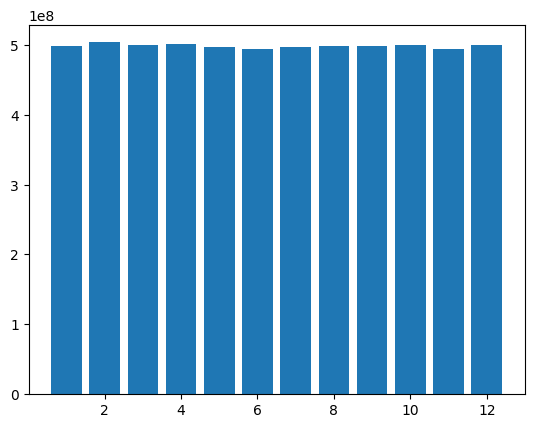

In [22]:
import matplotlib.pyplot as plt

plt.bar(x=df_vis["accession_month"], height=df_vis["balance"])

##### Scikit Learn

In [23]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor

In [24]:
ode = OrdinalEncoder()
ode.fit_transform(df)

array([[1.3790e+03, 2.8000e+01, 1.2810e+03, ..., 5.7029e+04, 1.6200e+02,
        1.0800e+02],
       [5.4400e+02, 3.6400e+02, 8.7890e+03, ..., 4.5841e+04, 9.9000e+02,
        9.1000e+01],
       [5.6670e+03, 3.4100e+02, 9.5790e+03, ..., 4.3176e+04, 7.9000e+01,
        2.6000e+01],
       ...,
       [1.0150e+03, 4.2600e+02, 5.0260e+03, ..., 9.8001e+04, 8.6500e+02,
        3.8000e+01],
       [1.1390e+03, 1.7600e+02, 8.1030e+03, ..., 2.2171e+04, 9.5600e+02,
        1.5000e+02],
       [1.2170e+03, 5.7300e+02, 3.5730e+03, ..., 9.4940e+04, 9.6600e+02,
        5.2000e+01]])

In [25]:
dt = DecisionTreeRegressor()
dt.fit(pl.DataFrame(ode.fit_transform(df)), df["balance"])

DecisionTreeRegressor()

##### Torch

In [26]:
df.select(cs.numeric()).to_torch()

tensor([[ 1.3790e+03,  5.8000e+02,  5.0000e+00,  ...,  1.5688e+02,
          3.5545e+15,  1.6200e+02],
        [ 5.4400e+02,  2.4100e+02,  8.0000e+00,  ...,  1.1225e+02,
          2.5174e+15,  9.9000e+02],
        [ 5.6670e+03,  6.8000e+02,  5.0000e+00,  ..., -1.0317e+02,
          2.2573e+15,  7.9000e+01],
        ...,
        [ 1.0150e+03,  7.5600e+02,  3.0000e+00,  ...,  1.3426e+02,
          4.7660e+18,  8.6500e+02],
        [ 1.1390e+03,  5.3000e+02,  2.0000e+00,  ..., -9.6464e+00,
          3.0527e+13,  9.5600e+02],
        [ 1.2170e+03,  1.0400e+02,  1.2000e+01,  ..., -1.0504e+02,
          4.3871e+18,  9.6600e+02]], dtype=torch.float64)

##### Catboost

In [28]:
from catboost import Pool, CatBoostRegressor

train_pool = Pool(df.drop("balance"), df.select("balance"))

CatBoostError: Invalid data type=<class 'polars.dataframe.frame.DataFrame'>: data must be list(), np.ndarray(), DataFrame(), Series(), FeaturesData  scipy.sparse matrix or filename str() or pathlib.Path().

In [36]:
from catboost import Pool, CatBoostRegressor

train_pool = Pool(
    df.select(cs.numeric()).drop("balance").to_pandas(),
    df.select("balance").to_pandas(),
)
model = CatBoostRegressor()
model = model.fit(train_pool)

Learning rate set to 0.084758
0:	learn: 288136717.5734124	total: 61.1ms	remaining: 1m 1s
1:	learn: 288121354.1755581	total: 65.7ms	remaining: 32.8s
2:	learn: 288106474.3467017	total: 70.3ms	remaining: 23.4s
3:	learn: 288094798.1795023	total: 74.2ms	remaining: 18.5s
4:	learn: 288079997.0144667	total: 78.3ms	remaining: 15.6s
5:	learn: 288062829.3114260	total: 83ms	remaining: 13.7s
6:	learn: 288050205.9657954	total: 86.9ms	remaining: 12.3s
7:	learn: 288033161.5623697	total: 91.3ms	remaining: 11.3s
8:	learn: 288020027.9153150	total: 95.5ms	remaining: 10.5s
9:	learn: 288004370.6225592	total: 99.4ms	remaining: 9.84s
10:	learn: 287979686.3620680	total: 104ms	remaining: 9.32s
11:	learn: 287966698.5958461	total: 108ms	remaining: 8.93s
12:	learn: 287950525.6525186	total: 113ms	remaining: 8.56s
13:	learn: 287933489.1798292	total: 117ms	remaining: 8.23s
14:	learn: 287917121.9011322	total: 121ms	remaining: 7.94s
15:	learn: 287901622.3358532	total: 125ms	remaining: 7.68s
16:	learn: 287884715.3143556

### And many more...